<a href="https://colab.research.google.com/github/scottboshell/codingplusmath/blob/Stock-Analysis/stock_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Introduction to the Code
This Python script leverages the yfinance library to fetch and analyze options data for a specified stock ticker. It processes this data to produce summary statistics and detailed breakdowns for each expiration date, including metrics such as strike prices, open interest, last prices, volumes, and notional values. The data is presented in tabular form using the PrettyTable library and visualized with matplotlib. This comprehensive analysis helps in understanding the options market for a given stock, which can be crucial for predicting price action based on the anticipated influx of liquidity into the market.

In [ ]:
!pip install pandas
!pip install yfinance
!pip install prettytable
!pip install matplotlib
!pip install openai

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 320.6/320.6 kB 2.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.6/75.6 kB 7.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.9/77.9 kB 5.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 5.2 MB/s eta 0:00:00


In [1]:
import yfinance as yf
import pandas as pd

def get_gme_options():
    # Step 1: Download options data for stock of choice
    ticker = 'NKLA'
    stock = yf.Ticker(ticker)

    # Get the expiration dates
    exp_dates = stock.options

    calls_data = []
    puts_data = []

    # Step 2: Loop through each expiration date to get the options data
    for date in exp_dates:
        opt = stock.option_chain(date)

        # Process call options
        calls = opt.calls
        for index, row in calls.iterrows():
            strike_price = row['strike']
            open_interest = row['openInterest']
            last_price = row['lastPrice']
            volume = row['volume']
            if not pd.isna(open_interest) and not pd.isna(last_price):
                calls_data.append([strike_price, open_interest, last_price, volume])

        # Process put options
        puts = opt.puts
        for index, row in puts.iterrows():
            strike_price = row['strike']
            open_interest = row['openInterest']
            last_price = row['lastPrice']
            volume = row['volume']
            if not pd.isna(open_interest) and not pd.isna(last_price):
                puts_data.append([strike_price, open_interest, last_price, volume])

    # Step 3: Create DataFrames
    call_columns = ['Strike Price', 'Call Open Interest', 'Call Last Price', 'Call Volume']
    put_columns = ['Strike Price', 'Put Open Interest', 'Put Last Price', 'Put Volume']
    calls_df = pd.DataFrame(calls_data, columns=call_columns)
    puts_df = pd.DataFrame(puts_data, columns=put_columns)

    # Step 4: Calculate the notional values
    calls_df['Call Notional Value'] = calls_df['Call Open Interest'] * calls_df['Call Last Price'] * 100  # Each option contract represents 100 shares
    puts_df['Put Notional Value'] = puts_df['Put Open Interest'] * puts_df['Put Last Price'] * 100  # Each option contract represents 100 shares

    # Step 5: Calculate total notional values
    total_call_notional_value = calls_df['Call Notional Value'].sum()
    total_put_notional_value = puts_df['Put Notional Value'].sum()
    total_notional_value = total_call_notional_value + total_put_notional_value

    # Step 6: Calculate total shares in the options chain
    total_call_shares = calls_df['Call Open Interest'].sum() * 100
    total_put_shares = puts_df['Put Open Interest'].sum() * 100
    total_shares = total_call_shares + total_put_shares

    return calls_df, puts_df, total_call_notional_value, total_put_notional_value, total_notional_value, total_shares

# Run the function and print the results
calls_df, puts_df, total_call_notional_value, total_put_notional_value, total_notional_value, total_shares = get_gme_options()
print("Calls DataFrame:")
print(calls_df)
print("Puts DataFrame:")
print(puts_df)
print(f"Total Notional Value of Call Options: ${total_call_notional_value:,.2f}")
print(f"Total Notional Value of Put Options: ${total_put_notional_value:,.2f}")
print(f"Total Notional Value of All Options: ${total_notional_value:,.2f}")
print(f"Total Shares in Options Chain: {total_shares:,}")




Calls DataFrame:
    Strike Price  Call Open Interest  Call Last Price  Call Volume  \
0            0.5                   0             0.04        873.0   
1            1.0                   0             0.01        245.0   
2            1.5                   0             0.02          7.0   
3            2.0                   0             0.03          7.0   
4            3.0                   0             0.01          1.0   
5            0.5                   0             0.04        276.0   
6            1.0                   0             0.01        167.0   
7            1.5                   0             0.02          8.0   
8            3.0                   0             0.01          6.0   
9            0.5                   0             0.06       1603.0   
10           1.0                   0             0.01        201.0   
11           1.5                   0             0.01          6.0   
12           2.0                   0             0.01          1.0   
13 

#Understanding Liquidity in Market Cap
Liquidity refers to how easily an asset can be bought or sold in the market without affecting its price. In the context of options trading, liquidity is often associated with the volume and open interest of options contracts. High liquidity typically indicates active trading and can lead to more stable prices, whereas low liquidity can result in higher volatility and wider bid-ask spreads.

#Options Market and Price Predictions
Options trading can provide valuable insights into future price movements due to the nature of the contracts. Investors often use options to hedge their positions or speculate on future price changes. By analyzing the open interest and notional values of call and put options, one can gauge market sentiment and the potential influx of liquidity into the underlying stock.

 - Open Interest: High open interest in call options may indicate bullish sentiment, as investors expect the stock price to rise. Conversely, high open interest in put options may suggest bearish sentiment.

- Notional Value: The notional value represents the total value of the underlying assets covered by the options. By summing the notional values of call and put options, one can estimate the total potential liquidity entering or exiting the market. Large notional values can indicate significant market movements as options contracts are exercised.

- Expiration Dates: The distribution of open interest and notional values across different expiration dates can indicate when significant price movements might occur. For instance, a high concentration of open interest in near-term expiration dates can lead to increased volatility as those dates approach.#

Summary Table:
+-----------------+-------------------+------------------+---------------------------+--------------------------+----------------------+--------------+
| Expiration Date | Total Call Shares | Total Put Shares | Total Call Notional Value | Total Put Notional Value | Total Notional Value | Total Shares |
+-----------------+-------------------+------------------+---------------------------+--------------------------+----------------------+--------------+
|    2024-06-07   |      2620100      |     1643400      |        $388,173.00        |       $647,741.00        |    $1,035,914.00     |   4263500    |
|    2024-06-14   |       641800      |      339200      |        $144,560.00        |       $203,453.00        |     $348,013.00      |    981000    |
|    2024-06-21   |      19899700     |     12875900     |       $14,444,981.00      |      $4,834,838.00       |    $19,279,819.00    |   32775600   |
|    2024-06-28   |       282900      |      148000      |         $99,31

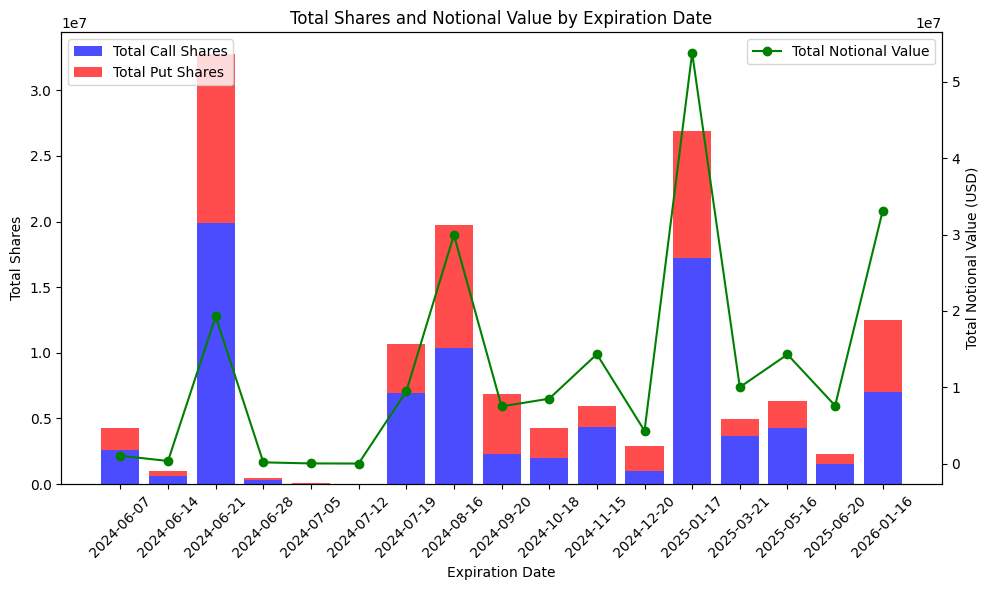

In [15]:
import yfinance as yf
import pandas as pd
from prettytable import PrettyTable
import matplotlib.pyplot as plt

def get_stock_options(ticker):
    # Step 1: Download options data for the specified stock
    stock = yf.Ticker(ticker)

    # Get the expiration dates
    exp_dates = stock.options

    summary_data = []
    detailed_data = {}

    # Step 2: Loop through each expiration date to get the options data
    for date in exp_dates:
        opt = stock.option_chain(date)

        # Process call options
        calls = opt.calls
        calls_data = []
        for index, row in calls.iterrows():
            strike_price = row['strike']
            open_interest = row['openInterest']
            last_price = row['lastPrice']
            volume = row['volume']
            if not pd.isna(open_interest) and not pd.isna(last_price):
                calls_data.append([strike_price, open_interest, last_price, volume])

        # Process put options
        puts = opt.puts
        puts_data = []
        for index, row in puts.iterrows():
            strike_price = row['strike']
            open_interest = row['openInterest']
            last_price = row['lastPrice']
            volume = row['volume']
            if not pd.isna(open_interest) and not pd.isna(last_price):
                puts_data.append([strike_price, open_interest, last_price, volume])

        # Create DataFrames for the current expiration date
        call_columns = ['Strike Price', 'Call Open Interest', 'Call Last Price', 'Call Volume']
        put_columns = ['Strike Price', 'Put Open Interest', 'Put Last Price', 'Put Volume']
        calls_df = pd.DataFrame(calls_data, columns=call_columns)
        puts_df = pd.DataFrame(puts_data, columns=put_columns)

        # Calculate the notional values for the current expiration date
        calls_df['Call Notional Value'] = calls_df['Call Open Interest'] * calls_df['Call Last Price'] * 100
        puts_df['Put Notional Value'] = puts_df['Put Open Interest'] * puts_df['Put Last Price'] * 100

        # Calculate total notional values and shares for the current expiration date
        total_call_notional_value = calls_df['Call Notional Value'].sum()
        total_put_notional_value = puts_df['Put Notional Value'].sum()
        total_call_shares = calls_df['Call Open Interest'].sum() * 100
        total_put_shares = puts_df['Put Open Interest'].sum() * 100

        # Append to summary data
        summary_data.append([date, total_call_shares, total_put_shares, total_call_notional_value, total_put_notional_value])

        # Store detailed data
        detailed_data[date] = {
            'calls': calls_df,
            'puts': puts_df
        }

    # Create summary DataFrame
    summary_columns = ['Expiration Date', 'Total Call Shares', 'Total Put Shares', 'Total Call Notional Value', 'Total Put Notional Value']
    summary_df = pd.DataFrame(summary_data, columns=summary_columns)
    summary_df['Total Notional Value'] = summary_df['Total Call Notional Value'] + summary_df['Total Put Notional Value']
    summary_df['Total Shares'] = summary_df['Total Call Shares'] + summary_df['Total Put Shares']

    return summary_df, detailed_data

# Run the function and print the results for what stock you want
summary_df, detailed_data = get_stock_options('SNAP') #Input is ticker symbol

# Create and print the summary table
summary_table = PrettyTable()
summary_table.field_names = ["Expiration Date", "Total Call Shares", "Total Put Shares", "Total Call Notional Value", "Total Put Notional Value", "Total Notional Value", "Total Shares"]

for index, row in summary_df.iterrows():
    summary_table.add_row([row['Expiration Date'], row['Total Call Shares'], row['Total Put Shares'], f"${row['Total Call Notional Value']:,.2f}", f"${row['Total Put Notional Value']:,.2f}", f"${row['Total Notional Value']:,.2f}", row['Total Shares']])

print("Summary Table:")
print(summary_table)

# Print detailed tables for each expiration date
for date, data in detailed_data.items():
    print(f"\nDetailed Data for Expiration Date: {date}")
    calls_df = data['calls']
    puts_df = data['puts']

    # Create tables for calls and puts
    calls_table = PrettyTable()
    calls_table.field_names = ["Strike Price", "Call Open Interest", "Call Last Price", "Call Volume", "Call Notional Value"]
    for index, row in calls_df.iterrows():
        calls_table.add_row([row['Strike Price'], row['Call Open Interest'], row['Call Last Price'], row['Call Volume'], f"${row['Call Notional Value']:,.2f}"])

    puts_table = PrettyTable()
    puts_table.field_names = ["Strike Price", "Put Open Interest", "Put Last Price", "Put Volume", "Put Notional Value"]
    for index, row in puts_df.iterrows():
        puts_table.add_row([row['Strike Price'], row['Put Open Interest'], row['Put Last Price'], row['Put Volume'], f"${row['Put Notional Value']:,.2f}"])

    print("Call Options:")
    print(calls_table)
    print("Put Options:")
    print(puts_table)


# Plotting the data with rotated tick labels on the x-axis
fig, ax1 = plt.subplots(figsize=(10, 6))

# Bar chart for Total Shares
ax1.bar(summary_df['Expiration Date'], summary_df['Total Call Shares'], label='Total Call Shares', alpha=0.7, color='b')
ax1.bar(summary_df['Expiration Date'], summary_df['Total Put Shares'], label='Total Put Shares', alpha=0.7, color='r', bottom=summary_df['Total Call Shares'])
ax1.set_ylabel('Total Shares')
ax1.set_xlabel('Expiration Date')
ax1.set_title('Total Shares and Notional Value by Expiration Date')
ax1.legend(loc='upper left')

# Rotate tick labels on the x-axis
plt.xticks(rotation=45)

# Line chart for Total Notional Value
ax2 = ax1.twinx()
ax2.plot(summary_df['Expiration Date'], summary_df['Total Notional Value'], label='Total Notional Value', color='g', marker='o')
ax2.set_ylabel('Total Notional Value (USD)')
ax2.legend(loc='upper right')

plt.tight_layout()
plt.show()


# Relationship Between Option Contracts and the Greeks

The Greeks describe the sensitivity of the price of an option contract to various factors. Below are the primary Greeks and how they relate to the option price.

### Delta (Δ)
Delta measures the rate of change of the option's price with respect to changes in the underlying asset's price.

$$\Delta = \frac{\partial V}{\partial S}$$

### Gamma (Γ)
Gamma measures the rate of change of Delta with respect to changes in the underlying asset's price.

$$ \Gamma = \frac{\partial^2 V}{\partial S^2} $$

### Theta (Θ)
Theta measures the rate of change of the option's price with respect to the passage of time.

$$ Θ = \frac{\partial V}{\partial t} $$

### Vega (ν)
Vega measures the rate of change of the option's price with respect to changes in the volatility of the underlying asset.

$$ ν = \frac{\partial V}{\partial \sigma} $$

### Rho (ρ)
Rho measures the rate of change of the option's price with respect to changes in the risk-free interest rate.

$$ ρ = \frac{\partial V}{\partial r} $$

### Combined Equation
The option price $V$ depends on several variables: the price of the underlying asset $S$, time to expiration $t$, volatility $sigma$, and the risk-free interest rate $r$. The combined sensitivity of the option price to these variables is expressed as:

$$ V = f(S, t, \sigma, r) $$

Where:
- $ V $ is the price of the option.
- $ S $ is the price of the underlying asset.
- $ t $ is time to expiration.
- $\sigma$ is the volatility.
- $r $ is the risk-free interest rate.

These equations help traders understand how different factors impact the price of an option.


In [ ]:
import yfinance as yf
import numpy as np
from scipy.stats import norm

def get_option_data(ticker):
    stock = yf.Ticker(ticker)
    stock_price = stock.history(period="1d")['Close'].iloc[0]
    expiry_dates = stock.options
    if not expiry_dates:
        raise Exception("No options data available for this stock.")
    expiry_date = expiry_dates[0]
    options_chain = stock.option_chain(expiry_date)
    calls = options_chain.calls
    puts = options_chain.puts
    return stock_price, calls, puts, expiry_date

def calculate_greeks(stock_price, strike_price, expiry_date, option_type='call'):
    # Time to expiration in years
    today = np.datetime64('today')
    time_to_expiry = (np.datetime64(expiry_date) - today).astype('timedelta64[D]').astype(int) / 365.0

    # Risk-free rate (assume 1%)
    risk_free_rate = 0.01

    # Stock price and strike price
    S = stock_price
    K = strike_price

    # Black-Scholes calculations
    d1 = (np.log(S / K) + (risk_free_rate + 0.5 * 0.5) * time_to_expiry) / (0.5 * np.sqrt(time_to_expiry))
    d2 = d1 - 0.5 * np.sqrt(time_to_expiry)

    # Option price
    if option_type == 'call':
        price = S * norm.cdf(d1) - K * np.exp(-risk_free_rate * time_to_expiry) * norm.cdf(d2)
    elif option_type == 'put':
        price = K * np.exp(-risk_free_rate * time_to_expiry) * norm.cdf(-d2) - S * norm.cdf(-d1)
    else:
        raise ValueError("Invalid option type. Use 'call' or 'put'.")

    # Delta
    delta = norm.cdf(d1) if option_type == 'call' else norm.cdf(d1) - 1

    # Gamma
    gamma = norm.pdf(d1) / (S * 0.5 * np.sqrt(time_to_expiry))

    # Theta
    if option_type == 'call':
        theta = (-S * norm.pdf(d1) * 0.5 * 0.5 / np.sqrt(time_to_expiry) - risk_free_rate * K * np.exp(-risk_free_rate * time_to_expiry) * norm.cdf(d2))
    elif option_type == 'put':
        theta = (-S * norm.pdf(d1) * 0.5 * 0.5 / np.sqrt(time_to_expiry) + risk_free_rate * K * np.exp(-risk_free_rate * time_to_expiry) * norm.cdf(-d2))

    # Vega
    vega = S * norm.pdf(d1) * np.sqrt(time_to_expiry)

    # Rho
    if option_type == 'call':
        rho = K * time_to_expiry * np.exp(-risk_free_rate * time_to_expiry) * norm.cdf(d2)
    elif option_type == 'put':
        rho = -K * time_to_expiry * np.exp(-risk_free_rate * time_to_expiry) * norm.cdf(-d2)

    return price, delta, gamma, theta, vega, rho

# Define the ticker symbol
ticker = "SNAP"

# Get the option data for the ticker
stock_price, calls, puts, expiry_date = get_option_data(ticker)

# Select the first call option's strike price
strike_price = calls['strike'].iloc[0]

# Calculate the Greeks for the selected call option
price, delta, gamma, theta, vega, rho = calculate_greeks(stock_price, strike_price, expiry_date, 'call')

# Print the results
print(f"Stock Price: {stock_price}")
print(f"Strike Price: {strike_price}")
print(f"Expiry Date: {expiry_date}")
print(f"Option Type: call")
print(f"Price: {price}")
print(f"Delta: {delta}")
print(f"Gamma: {gamma}")
print(f"Theta: {theta}")
print(f"Vega: {vega}")
print(f"Rho: {rho}")


Stock Price: 15.006199836730957
Strike Price: 2.5
Expiry Date: 2024-05-31
Option Type: call
Price: 12.506199836730957
Delta: 1.0
Gamma: nan
Theta: nan
Vega: 0.0
Rho: 0.0


<ipython-input-2-3689a5a340be>:30: RuntimeWarning: divide by zero encountered in scalar divide
  d1 = (np.log(S / K) + (risk_free_rate + 0.5 * 0.5) * time_to_expiry) / (0.5 * np.sqrt(time_to_expiry))
<ipython-input-2-3689a5a340be>:45: RuntimeWarning: invalid value encountered in scalar divide
  gamma = norm.pdf(d1) / (S * 0.5 * np.sqrt(time_to_expiry))
<ipython-input-2-3689a5a340be>:49: RuntimeWarning: invalid value encountered in scalar divide
  theta = (-S * norm.pdf(d1) * 0.5 * 0.5 / np.sqrt(time_to_expiry) - risk_free_rate * K * np.exp(-risk_free_rate * time_to_expiry) * norm.cdf(d2))


In [ ]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

def analyze_dataframe(df):
    # Extract features and target variable
    X = df[['Price', 'Delta', 'Gamma', 'Theta', 'Vega', 'Rho']]
    y = df['Strike Price']

    # Split data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Fit linear regression model
    model = LinearRegression()
    model.fit(X_train, y_train)

    # Make predictions on the test set
    y_pred = model.predict(X_test)


    # Print model coefficients and MSE
    print("Model Coefficients:")
    for i, coef in enumerate(model.coef_):
        print(f"Coefficient {i+1}: {coef}")

    # Analyze coefficients
    feature_names = ['Price', 'Delta', 'Gamma', 'Theta', 'Vega', 'Rho']
    coef_analysis = pd.DataFrame({'Feature': feature_names, 'Coefficient': model.coef_})
    print("\nCoefficient Analysis:")
    print(coef_analysis)

    # Interpretation of coefficients
    print("\nInterpretation of Coefficients:")
    print("1. Price (Option Price):")
    print("- A one-unit increase in option price is associated with a change in strike price of approximately", round(model.coef_[0], 3))
    print("2. Delta:")
    print("- A one-unit increase in delta is associated with a change in strike price of approximately", round(model.coef_[1], 3))
    print("3. Gamma:")
    print("- A one-unit increase in gamma is associated with a change in strike price of approximately", round(model.coef_[2], 3))
    print("4. Theta:")
    print("- A one-unit increase in theta is associated with a change in strike price of approximately", round(model.coef_[3], 3))
    print("5. Vega:")
    print("- A one-unit increase in vega is associated with a change in strike price of approximately", round(model.coef_[4], 3))
    print("6. Rho:")
    print("- A one-unit increase in rho is associated with a change in strike price of approximately", round(model.coef_[5], 3))




# Analyze the DataFrame using linear regression
analyze_dataframe(options_df)


Model Coefficients:
Coefficient 1: -0.7065410557837475
Coefficient 2: -1.398456719231493
Coefficient 3: -271.03865605968514
Coefficient 4: -5.375716739700783
Coefficient 5: 0.4665278720104856
Coefficient 6: -0.27781394166864404

Mean Squared Error: 755.6414585734419

Coefficient Analysis:
  Feature  Coefficient
0   Price    -0.706541
1   Delta    -1.398457
2   Gamma  -271.038656
3   Theta    -5.375717
4    Vega     0.466528
5     Rho    -0.277814

Interpretation of Coefficients:
1. Price (Option Price):
- A one-unit increase in option price is associated with a change in strike price of approximately -0.707
2. Delta:
- A one-unit increase in delta is associated with a change in strike price of approximately -1.398
3. Gamma:
- A one-unit increase in gamma is associated with a change in strike price of approximately -271.039
4. Theta:
- A one-unit increase in theta is associated with a change in strike price of approximately -5.376
5. Vega:
- A one-unit increase in vega is associated wit